In [643]:
import pandas as pd
import numpy as np
import category_encoders as ce
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [644]:
def extractFields(data):
    
    #print("hello")
    jsonArray =[]
    list = data['full_name'].tolist()
    for name in list:
        jsonObj = {}
        strList = name.split()
        #print(strList)
        if any("." in s or "iss" in s for s in strList):
            #print("yes")
            jsonObj['title'] = strList[0]
            jsonObj['fname'] = strList[1]
            jsonObj['lname'] = strList[len(strList)-1]
            # print(title,fname,lname)
        else:
            #print("no")    
            title = ""
            jsonObj['fname'] = strList[0]
            jsonObj['lname'] = strList[len(strList)-1]
            # print(title,fname,lname)
        jsonArray.append(jsonObj)
    #print(json.dumps(jsonArray))
    df_names = pd.DataFrame(jsonArray)
    final_df = pd.concat([data, df_names],axis=1)
    return final_df

In [645]:
import warnings
warnings.filterwarnings('ignore')

In [646]:
pd.set_option('display.max_rows', 25000)
pd.set_option('display.max_columns', 25000)

In [647]:
mortgage_df = pd.read_csv('Mortgage.csv')
mortgage_df.head(5)

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


In [648]:
mortgage_df = extractFields(mortgage_df)
mortgage_df.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,title,fname,lname
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Mr.,Dale,Coles
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,NaN,Joel,Allen
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,Mr.,Craig,Davis
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,Mr.,Brandon,Thornton
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,Miss,Brett,Fletcher


In [649]:
mortgage_df['title'] = mortgage_df['title'].fillna('')
#mortgage_df['final_name'] = mortgage_df['title'] + ' ' + mortgage_df['fname'] +  ' '+ mortgage_df['lname']
mortgage_df['final_name'] = mortgage_df['fname'] +  ' '+ mortgage_df['lname']
mortgage_df.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,title,fname,lname,final_name
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Mr.,Dale,Coles,Dale Coles
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,,Joel,Allen,Joel Allen
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,Mr.,Craig,Davis,Craig Davis
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,Mr.,Brandon,Thornton,Brandon Thornton
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,Miss,Brett,Fletcher,Brett Fletcher


In [650]:
year = 2018
#today = date.today()
#year = today.year
mortgage_df['dob'] = pd.to_datetime(mortgage_df['dob'])
mortgage_df['age'] = year - pd.DatetimeIndex(mortgage_df['dob']).year
mortgage_df.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,title,fname,lname,final_name,age
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Mr.,Dale,Coles,Dale Coles,39
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,,Joel,Allen,Joel Allen,50
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,Mr.,Craig,Davis,Craig Davis,39
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,Mr.,Brandon,Thornton,Brandon Thornton,53
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,Miss,Brett,Fletcher,Brett Fletcher,28


In [651]:
campaign_df = pd.read_csv('Campaign.csv')
campaign_df['name_title'] = campaign_df['name_title'].fillna('')
#campaign_df['final_name'] = campaign_df['name_title'] + ' ' + campaign_df['first_name']  + ' ' + campaign_df['last_name']
campaign_df['final_name'] = campaign_df['first_name']  + ' ' + campaign_df['last_name']
campaign_df.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,final_name
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Dale Coles
1,2.764970e+12,,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No,Joel Allen
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No,Craig Davis
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No,Brandon Thornton
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No,Brett Fletcher


In [641]:
switched = campaign_df[campaign_df['created_account'] == 'Yes']
switched['education'].value_counts()

Bachelors       69
HS-grad         45
Masters         40
Some-college    30
Prof-school     22
Doctorate       13
Assoc-voc       10
Assoc-acdm       7
11th             3
10th             1
Name: education, dtype: int64

In [652]:
mortgage_df['final_name'] = mortgage_df['final_name'].str.strip()
campaign_df['final_name'] = campaign_df['final_name'].str.strip()

In [653]:
print(campaign_df.shape)
print(mortgage_df.shape)

(32060, 17)
(32561, 23)


In [654]:
concat_df = pd.merge(campaign_df,mortgage_df, on=['age','final_name'])
concat_df.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account,final_name,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,title,fname,lname
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No,Dale Coles,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Mr.,Dale,Coles
1,2.764970e+12,,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No,Joel Allen,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,,Joel,Allen
2,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No,Brandon Thornton,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,Mr.,Brandon,Thornton
3,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No,Brett Fletcher,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,Miss,Brett,Fletcher
4,3.234960e+12,Mrs.,Hugh,Armstrong,31,SN8G 3XD,Never-married,Masters,Insurance broker,12,18,6,3,1,lydiataylor@wallace.com,Yes,Hugh Armstrong,Hugh Stacey Armstrong,1987-03-02,Swindon,NW384000,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781,,Hugh,Armstrong


In [655]:
concat_df.shape

(16586, 38)

In [616]:
concat_df.shape

(13402, 38)

In [656]:
concat_df['created_account'].value_counts()

No     1468
Yes     136
Name: created_account, dtype: int64

In [657]:
columns_to_drop = ['participant_id', 'name_title', 'first_name', 'last_name','company_email',
                  'final_name', 'full_name', 'dob','paye', 'title','fname','lname']

concat_df.drop(columns_to_drop,axis=1,inplace=True)
concat_df.head()

,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,No,Edinburgh,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,No,Leeds,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,No,Edinburgh,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
3,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,No,Swindon,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409
4,31,SN8G 3XD,Never-married,Masters,Insurance broker,12,18,6,3,1,Yes,Swindon,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781


In [658]:
high_correlation = ['postcode','marital_status','education_num']
concat_df.drop(high_correlation,axis=1,inplace=True)
concat_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,No,Edinburgh,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,50,Bachelors,"Administrator, sports",4,9,6,1,No,Leeds,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,53,11th,Facilities assistant,1,9,2,0,No,Edinburgh,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
3,28,Bachelors,Information systems manager,12,8,9,1,No,Swindon,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409
4,31,Masters,Insurance broker,12,6,3,1,Yes,Swindon,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781


In [659]:
clean_df = concat_df.copy()

In [660]:
#Apply OneHotEncoding on 'age'
clean_df['age_by_decade'] = pd.cut(x=clean_df['age'], bins=[10, 20, 29, 39, 49, 59, 69, 79, 89], labels=['teens','20s', '30s', '40s', '50s', '60s', '70s', '80s'])
ohe_age = OneHotEncoder(sparse=False)
X = clean_df['age_by_decade']
age_by_decade_df = pd.DataFrame(ohe_age.fit_transform(np.array(X).reshape(-1, 1)))
age_by_decade_df.columns = ['age_by_decade_20s','age_by_decade_30s','age_by_decade_40s','age_by_decade_50s','age_by_decade_60s','age_by_decade_70s','age_by_decade_80s','age_by_decade_90s','teens']
age_by_decade_df.drop('age_by_decade_90s',axis =1, inplace=True)
clean_df = pd.concat([clean_df,age_by_decade_df],axis=1)

In [661]:
#Apply OneHotEncoding on 'education'
ohe_education = OrdinalEncoder(categories = [['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Bachelors','Masters','Assoc-voc','Assoc-acdm','Prof-school','Doctorate']])
X = clean_df['education']
education_df = pd.DataFrame(ohe_education.fit_transform(np.array(X).reshape(-1,1)))
education_df.columns = ['education_encoded']
clean_df = pd.concat([clean_df,education_df],axis=1)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,No,Edinburgh,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,No,Leeds,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0
2,53,11th,Facilities assistant,1,9,2,0,No,Edinburgh,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
3,28,Bachelors,Information systems manager,12,8,9,1,No,Swindon,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,31,Masters,Insurance broker,12,6,3,1,Yes,Swindon,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [662]:
#Apply LabelEncoder on 'job_title'
job_title = clean_df['job_title'].tolist()
le_job_title = LabelEncoder()
le_job_title.fit(job_title)
clean_df['job_title_encoded'] = pd.DataFrame(le_job_title.transform(job_title))
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,No,Edinburgh,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266
1,50,Bachelors,"Administrator, sports",4,9,6,1,No,Leeds,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15
2,53,11th,Facilities assistant,1,9,2,0,No,Edinburgh,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239
3,28,Bachelors,Information systems manager,12,8,9,1,No,Swindon,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326
4,31,Masters,Insurance broker,12,6,3,1,Yes,Swindon,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330


In [663]:
substitute = {'Yes' : 1, 'No' : 0}
clean_df['created_account'] = clean_df['created_account'].map(substitute)

In [664]:
#Frequency encode 'town'
freq = clean_df.groupby('town').size()/len(clean_df)  
clean_df.loc[:, "{}_freq_encode".format('town')] = clean_df['town'].map(freq)  
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,£3312.78 per month,4,4,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607


In [665]:
#'salary_band' preprocessing. Use data from currency conversion API and convert into GBP 

clean_df['salary_band_new'] = clean_df['salary_band'].astype(str).str.lower()
clean_df['salary_band_new'].replace({' yearly': '', '£':''}, regex=True, inplace=True)
clean_df['salary_band_new'].replace({' pw': ' * 52', ' per month':' * 12'}, regex=True, inplace=True)
clean_df['salary_band_new'].replace({' range': '', ' - ': ' + '}, regex=True, inplace=True)
clean_df['salary_band_new'].replace({'^[a-z]+$': 0}, regex=True, inplace=True)
clean_df.loc[clean_df.astype(str).salary_band_new.str.contains('\+'),'salary_band_new'] = '(' + clean_df['salary_band_new'].astype(str) + ') / 2'
clean_df['currency'] = clean_df['salary_band_new'].str[-3:]            
clean_df['currency'] = clean_df['currency'].fillna('gbp')
clean_df['currency'].replace({'[^a-z]+$': 'gbp'}, regex=True, inplace=True)
clean_df['salary_band_new'].replace({'[a-z]+$': ''}, regex=True, inplace=True)
clean_df['salary_band_new'] = clean_df['salary_band_new'].astype(str)
clean_df['salary_band_new'] = clean_df['salary_band_new'].apply(lambda x: eval(x) if (pd.notnull(x)) else x)

currency_conversion = pd.read_csv('currency_conversion.csv')
currency_conversion.drop('Unnamed: 0',axis = 1,inplace=True)    

clean_df = pd.merge(clean_df,currency_conversion,on='currency',how='inner')
clean_df = clean_df.assign(salary_in_gbp= lambda x:(x['salary_band_new'] / x['rate']))
clean_df.drop(['salary_band','salary_band_new','currency','rate'],axis=1,inplace=True)

upper_cap = round(clean_df['salary_in_gbp'].quantile(0.92),2)

clean_df['salary_in_gbp'] = np.where(clean_df['salary_in_gbp']>upper_cap,upper_cap,clean_df.salary_in_gbp)
clean_df['salary_in_gbp'].to_csv('salary.csv')
clean_df['salary_in_gbp_deskewed'] = np.sqrt(clean_df['salary_in_gbp'])

In [666]:
clean_df['employement_duration_years'] =  round(((clean_df['years_with_employer'] * 12) + (clean_df['months_with_employer']))/12,2)
clean_df.drop(['years_with_employer','months_with_employer'],axis=1,inplace=True)

upper_cap = round(clean_df['employement_duration_years'].quantile(0.97),2)
clean_df['employement_duration_years'] = np.where(clean_df['employement_duration_years']>upper_cap,upper_cap,clean_df.employement_duration_years)
clean_df['employement_duration_years_deskewed'] = np.sqrt(clean_df['employement_duration_years'])

In [667]:
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50,14084,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865


In [668]:
upper_cap = round(clean_df['hours_per_week'].quantile(0.97),2)
clean_df['hours_per_week'] = np.where(clean_df['hours_per_week']>upper_cap,upper_cap,clean_df.hours_per_week)

In [669]:
clean_df['net_profit'] = clean_df['capital_gain'] - clean_df['capital_loss']
clean_df.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

upper_cap = round(clean_df['net_profit'].quantile(0.97),2)
clean_df['net_profit'] = np.where(clean_df['net_profit']>upper_cap,upper_cap,clean_df.net_profit)
clean_df['net_profit_deskewed'] = np.sqrt(clean_df['net_profit'])

In [670]:
clean_df['new_mortgage'] = 1

In [671]:
substitute = {'Male' : 1, 'Female' : 0}
clean_df['sex'] = clean_df['sex'].map(substitute)

In [672]:
rel = clean_df['religion'].value_counts().index.to_list()
sorted(rel)

['Buddhism',
 'Christianity',
 'Hinduism',
 'Islam',
 'Judaism',
 'Not Stated',
 'Other religions',
 'Sikhism']

In [673]:
cols = ['religion_Buddhism',
 'religion_Christianity',
 'religion_Hinduism',
 'religion_Islam',
 'religion_Judaism',
 'religion_Not-Stated',
 'religion_Other-religions',
 'religion_Sikhism']

In [674]:
ohe = OneHotEncoder(sparse=False)
X = clean_df['religion']
religion_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
religion_df.columns = cols
religion_df.drop(['religion_Judaism'],axis =1, inplace=True)

In [675]:
clean_df = pd.concat([clean_df,religion_df],axis=1)
clean_df.drop('religion',axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,relationship,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,Not-in-family,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,Husband,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,Husband,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,Wife,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,Not-in-family,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [676]:
rel = clean_df['relationship'].value_counts().index.to_list()
sorted(rel)


['Husband',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife']

In [677]:
cols = ['relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife']
ohe = OneHotEncoder(sparse=False)
X = clean_df['relationship']
relationship_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
relationship_df.columns = cols
relationship_df.drop('relationship_Other-relative',axis =1, inplace=True)

In [678]:
clean_df = pd.concat([clean_df,relationship_df],axis=1)
clean_df.drop('relationship',axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,race,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,White,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,White,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,Black,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,Black,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,White,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [679]:
rel = clean_df['race'].value_counts().index.to_list()
sorted(rel)

['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [680]:
cols = ['race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']
ohe = OneHotEncoder(sparse=False)
X = clean_df['race']
race_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
race_df.columns = list(ohe.get_feature_names(['race']))
race_df.drop(['race_Other'],axis =1, inplace=True)

In [681]:
clean_df = pd.concat([clean_df,race_df],axis=1)
clean_df.drop('race',axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,native_country,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,United Kingdom,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,United Kingdom,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,United Kingdom,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,Sweden,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,United Kingdom,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [682]:
clean_df['native_country'].replace({'\?': 'Unknown'}, regex=True, inplace=True)
round(clean_df['native_country'].value_counts(normalize=True)*100,2)

United Kingdom                89.48
Scotland                       2.01
Unknown                        1.94
Poland                         0.77
Germany                        0.40
India                          0.37
Bulgaria                       0.34
Wales                          0.33
Sweden                         0.31
England                        0.30
Jamaica                        0.29
Canada                         0.29
Netherlands                    0.27
Italy                          0.24
Romania                        0.22
Vietnam                        0.22
Guatemala                      0.21
China                          0.20
Japan                          0.20
Iran                           0.16
Columbia                       0.15
Haiti                          0.12
Taiwan                         0.12
Ecuador                        0.10
Portugal                       0.10
Greece                         0.10
Peru                           0.10
Nicaragua                   

In [683]:
native_country_list = clean_df['native_country'].tolist()

le = LabelEncoder()
le.fit(native_country_list)
clean_df['native_country_encoded'] = pd.DataFrame(le.transform(native_country_list))

In [684]:
clean_df['workclass'].replace({'\?': 'Unknown'}, regex=True, inplace=True)
round(clean_df['workclass'].value_counts(normalize=True)*100,2)

Private             69.67
Self-emp-not-inc     7.78
Local-gov            6.19
Unknown              5.64
State-gov            4.02
Self-emp-inc         3.64
Federal-gov          3.01
Without-pay          0.04
Never-worked         0.01
Name: workclass, dtype: float64

In [685]:
native_country_df = pd.DataFrame(round(clean_df['native_country'].value_counts(normalize=True)*100,2))
native_country_df.reset_index(inplace=True)
native_country_df.columns=['native_country', 'Percentage']
native_country_df.head()

,native_country,Percentage
0,United Kingdom,89.48
1,Scotland,2.01
2,Unknown,1.94
3,Poland,0.77
4,Germany,0.40


In [686]:
top5= [col for col in clean_df['native_country'].value_counts().sort_values(ascending = False).head(5).index]
for col in top5:
    col=col + '_native_country'
    clean_df[col] = np.where(clean_df['native_country']==col,1,0)

clean_df.drop('native_country',axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,workclass,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,native_country_encoded,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,State-gov,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,Self-emp-not-inc,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,Private,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0,0,0,0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,Private,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,0,0,0,0,0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,Private,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0


In [687]:
clean_df['workclass'].replace({'\?': 'Unknown'}, regex=True, inplace=True)
round(clean_df['workclass'].value_counts(normalize=True)*100,2)

Private             69.67
Self-emp-not-inc     7.78
Local-gov            6.19
Unknown              5.64
State-gov            4.02
Self-emp-inc         3.64
Federal-gov          3.01
Without-pay          0.04
Never-worked         0.01
Name: workclass, dtype: float64

In [688]:
rel = clean_df['workclass'].value_counts().index.to_list()
sorted(rel)

['Federal-gov',
 'Local-gov',
 'Never-worked',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Unknown',
 'Without-pay']

In [689]:
cols = ['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Unknown',
 'workclass_Without-pay']
ohe = OneHotEncoder(sparse=False)
X = clean_df['workclass']
workclass_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
workclass_df.columns = list(ohe.get_feature_names(['workclass']))
workclass_df.drop('workclass_Never-worked',axis =1, inplace=True)

In [690]:
clean_df = pd.concat([clean_df,workclass_df],axis=1)
clean_df.drop('workclass',axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,native_country_encoded,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='demographic_characteristic', ylabel='Density'>

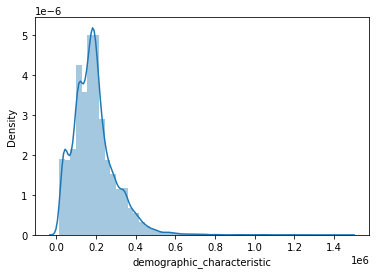

In [691]:
sns.distplot(clean_df['demographic_characteristic'])

<AxesSubplot:xlabel='demographic_characteristic', ylabel='Density'>

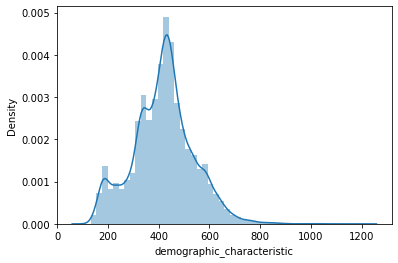

In [692]:
sns.distplot(np.sqrt(clean_df['demographic_characteristic']))

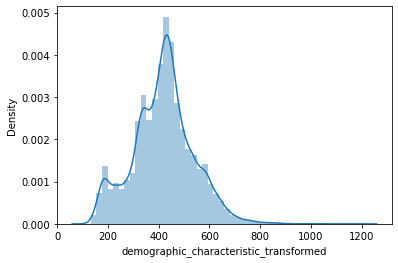

In [693]:
clean_df['demographic_characteristic_transformed'] = np.sqrt(clean_df['demographic_characteristic'])
sns.distplot(clean_df['demographic_characteristic_transformed'])
plt.show()

In [694]:
bin_labels_5 = ['demographic_group_1', 'demographic_group_2', 'demographic_group_3', 'demographic_group_4', 'demographic_group_5']
clean_df['demographic_characteristic_transformed_bins'] = pd.qcut(clean_df['demographic_characteristic_transformed'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,native_country_encoded,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_characteristic_transformed,demographic_characteristic_transformed_bins
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,77516,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,278.416954,demographic_group_1
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,83311,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,288.636450,demographic_group_1
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,234721,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,484.480134,demographic_group_4
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,338409,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,581.729318,demographic_group_5
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,45781,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,213.964950,demographic_group_1


In [695]:
rel = clean_df['demographic_characteristic_transformed_bins'].value_counts().index.to_list()
sorted(rel)

['demographic_group_1',
 'demographic_group_2',
 'demographic_group_3',
 'demographic_group_4',
 'demographic_group_5']

In [696]:
ohe = OneHotEncoder(sparse=False)
X = clean_df['demographic_characteristic_transformed_bins']
demographic_df = pd.DataFrame(ohe.fit_transform(np.array(X).reshape(-1, 1)))
demographic_df.columns = ['demographic_group_1', 'demographic_group_2','demographic_group_3','demographic_group_4','demographic_group_5']
demographic_df.drop('demographic_group_5',axis =1, inplace=True)
demographic_df.head()

,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [697]:
clean_df = pd.concat([clean_df,demographic_df],axis=1)
clean_df.drop(['demographic_characteristic','demographic_characteristic_transformed','demographic_characteristic_transformed_bins'],axis=1,inplace=True)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,native_country_encoded,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [698]:
scale = ['occupation_level','familiarity_FB','view_FB','hours_per_week','education_encoded',
         'job_title_encoded','salary_in_gbp_deskewed',
         'employement_duration_years_deskewed','net_profit_deskewed']

scaler = StandardScaler()
clean_df_scaled = pd.DataFrame(scaler.fit_transform(clean_df[scale]))
clean_df_scaled.columns = ['occupation_level_scaled','familiarity_FB_scaled','view_FB_scaled',
                           'hours_per_week_scaled','education_encoded_scaled',
         'job_title_encoded_scaled','salary_in_gbp_scaled',
         'employement_duration_years_scaled','net_profit_scaled']
clean_df_scaled.head()

,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,education_encoded_scaled,job_title_encoded_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled
0,-1.759842,0.643342,1.504224,-0.016936,0.514696,0.156556,-0.629906,2.156632,1.853456
1,-0.980942,1.395075,0.325844,-2.393730,0.514696,-1.322874,-0.711609,2.330528,-0.306646
2,-1.759842,1.395075,-1.245330,-0.016936,-1.217335,-0.002586,-0.563267,2.330528,-0.306646
3,1.096123,1.019209,1.504224,-0.016936,0.514696,0.510205,0.239929,-0.130584,-0.306646
4,1.096123,0.267476,-0.852537,0.863358,0.947704,0.533781,0.574502,0.050230,3.755459


In [699]:
clean_df = pd.concat([clean_df, clean_df_scaled], axis=1)
clean_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,created_account,town,hours_per_week,new_mortgage,sex,age_by_decade,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,education_encoded,job_title_encoded,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,employement_duration_years,employement_duration_years_deskewed,net_profit,net_profit_deskewed,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,native_country_encoded,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,education_encoded_scaled,job_title_encoded_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled
0,39,Bachelors,Furniture conservator/restorer,1,7,9,0,0.0,Edinburgh,40.0,1,1,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,266,0.596346,18109.00,134.569685,20.50,4.527693,2174.0,46.626173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.759842,0.643342,1.504224,-0.016936,0.514696,0.156556,-0.629906,2.156632,1.853456
1,50,Bachelors,"Administrator, sports",4,9,6,1,0.0,Leeds,13.0,1,1,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,15,0.047811,16945.00,130.172962,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.980942,1.395075,0.325844,-2.393730,0.514696,-1.322874,-0.711609,2.330528,-0.306646
2,53,11th,Facilities assistant,1,9,2,0,0.0,Edinburgh,40.0,1,1,50s,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,239,0.596346,19087.00,138.155709,22.37,4.729693,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.759842,1.395075,-1.245330,-0.016936,-1.217335,-0.002586,-0.563267,2.330528,-0.306646
3,28,Bachelors,Information systems manager,12,8,9,1,0.0,Swindon,40.0,1,0,20s,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,326,0.162607,32898.00,181.378058,3.50,1.870829,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.096123,1.019209,1.504224,-0.016936,0.514696,0.510205,0.239929,-0.130584,-0.306646
4,31,Masters,Insurance broker,12,6,3,1,1.0,Swindon,50.0,1,0,30s,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,330,0.162607,39753.36,199.382447,4.33,2.080865,7688.0,87.681241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.096123,0.267476,-0.852537,0.863358,0.947704,0.533781,0.574502,0.050230,3.755459


In [700]:
clean_df.columns

Index(['age', 'education', 'job_title', 'occupation_level', 'familiarity_FB',
       'view_FB', 'interested_insurance', 'created_account', 'town',
       'hours_per_week', 'new_mortgage', 'sex', 'age_by_decade',
       'age_by_decade_20s', 'age_by_decade_30s', 'age_by_decade_40s',
       'age_by_decade_50s', 'age_by_decade_60s', 'age_by_decade_70s',
       'age_by_decade_80s', 'teens', 'education_encoded', 'job_title_encoded',
       'town_freq_encode', 'salary_in_gbp', 'salary_in_gbp_deskewed',
       'employement_duration_years', 'employement_duration_years_deskewed',
       'net_profit', 'net_profit_deskewed', 'religion_Buddhism',
       'religion_Christianity', 'religion_Hinduism', 'religion_Islam',
       'religion_Not-Stated', 'religion_Other-religions', 'religion_Sikhism',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_B

In [701]:
model_cols = ['interested_insurance','created_account','new_mortgage','sex',
             'age_by_decade_20s', 'age_by_decade_30s', 'age_by_decade_40s',
             'age_by_decade_50s', 'age_by_decade_60s', 'age_by_decade_70s',
             'age_by_decade_80s', 'teens','town_freq_encode','religion_Buddhism',
             'religion_Christianity', 'religion_Hinduism', 'religion_Islam',
             'religion_Not-Stated', 'religion_Other-religions', 'religion_Sikhism',
             'relationship_Husband', 'relationship_Not-in-family',
             'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
              'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
               'race_White','United Kingdom_native_country',
               'Scotland_native_country', 'Unknown_native_country',
               'Poland_native_country', 'Germany_native_country',
               'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
               'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
               'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay',
               'demographic_group_1', 'demographic_group_2', 'demographic_group_3',
               'demographic_group_4', 'occupation_level_scaled',
               'familiarity_FB_scaled', 'view_FB_scaled', 'hours_per_week_scaled',
               'salary_in_gbp_scaled', 'employement_duration_years_scaled',
               'net_profit_scaled', 'occupation_level_scaled', 'familiarity_FB_scaled',
               'view_FB_scaled', 'hours_per_week_scaled', 'education_encoded_scaled',
               'job_title_encoded_scaled', 'salary_in_gbp_scaled',
               'employement_duration_years_scaled', 'net_profit_scaled']

In [702]:
model_df = clean_df[model_cols]
model_df.head()

,interested_insurance,created_account,new_mortgage,sex,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,town_freq_encode,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,education_encoded_scaled,job_title_encoded_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled
0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.759842,0.643342,1.504224,-0.016936,-0.629906,2.156632,1.853456,-1.759842,0.643342,1.504224,-0.016936,0.514696,0.156556,-0.629906,2.156632,1.853456
1,1,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.047811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.980942,1.395075,0.325844,-2.393730,-0.711609,2.330528,-0.306646,-0.980942,1.395075,0.325844,-2.393730,0.514696,-1.322874,-0.711609,2.330528,-0.306646
2,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.759842,1.395075,-1.245330,-0.016936,-0.563267,2.330528,-0.306646,-1.759842,1.395075,-1.245330,-0.016936,-1.217335,-0.002586,-0.563267,2.330528,-0.306646
3,1,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.096123,1.019209,1.504224,-0.016936,0.239929,-0.130584,-0.306646,1.096123,1.019209,1.504224,-0.016936,0.514696,0.510205,0.239929,-0.130584,-0.306646
4,1,1.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.096123,0.267476,-0.852537,0.863358,0.574502,0.050230,3.755459,1.096123,0.267476,-0.852537,0.863358,0.947704,0.533781,0.574502,0.050230,3.755459


In [703]:
model_df = model_df.loc[:,~model_df.columns.duplicated()]
model_df.head()

,interested_insurance,created_account,new_mortgage,sex,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,town_freq_encode,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled,education_encoded_scaled,job_title_encoded_scaled
0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.759842,0.643342,1.504224,-0.016936,-0.629906,2.156632,1.853456,0.514696,0.156556
1,1,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.047811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.980942,1.395075,0.325844,-2.393730,-0.711609,2.330528,-0.306646,0.514696,-1.322874
2,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.759842,1.395075,-1.245330,-0.016936,-0.563267,2.330528,-0.306646,-1.217335,-0.002586
3,1,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.096123,1.019209,1.504224,-0.016936,0.239929,-0.130584,-0.306646,0.514696,0.510205
4,1,1.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.096123,0.267476,-0.852537,0.863358,0.574502,0.050230,3.755459,0.947704,0.533781


In [704]:
target_df = model_df[model_df['created_account'].isnull()]
target_df.head()

,interested_insurance,created_account,new_mortgage,sex,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,town_freq_encode,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,net_profit_scaled,education_encoded_scaled,job_title_encoded_scaled
7,1,NaN,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.615389,-1.235990,1.897018,2.183799,1.588402,0.523472,3.755459,0.514696,0.368745
14,1,NaN,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.721309,1.019209,-0.459743,-0.016936,-0.630107,-0.956835,-0.306646,-1.217335,-0.603788
15,1,NaN,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.721309,1.019209,-0.459743,-1.777524,-0.194268,-1.036472,-0.306646,-1.217335,-0.603788
75,0,NaN,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.057590,1.019209,-0.459743,-0.897230,-0.638620,-0.401925,-0.306646,1.813719,-0.639153
76,0,NaN,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.057590,1.019209,-0.459743,-0.721171,-0.148581,-0.846482,-0.306646,1.813719,-0.639153


In [705]:
model_df = model_df[model_df['created_account'].notnull()]
model_df.drop(['net_profit_scaled'],axis=1,inplace=True)
model_df.columns

Index(['interested_insurance', 'created_account', 'new_mortgage', 'sex',
       'age_by_decade_20s', 'age_by_decade_30s', 'age_by_decade_40s',
       'age_by_decade_50s', 'age_by_decade_60s', 'age_by_decade_70s',
       'age_by_decade_80s', 'teens', 'town_freq_encode', 'religion_Buddhism',
       'religion_Christianity', 'religion_Hinduism', 'religion_Islam',
       'religion_Not-Stated', 'religion_Other-religions', 'religion_Sikhism',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_White', 'United Kingdom_native_country',
       'Scotland_native_country', 'Unknown_native_country',
       'Poland_native_country', 'Germany_native_country',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'wo

In [706]:
y = model_df.pop('created_account')
X = model_df

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=111)
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (1283, 53)
Training dataset target size (1283,)
Test dataset size (321, 53)
Test dataset target size (321,)


In [708]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 108
Before OverSampling, counts of label '0': 1175 

After OverSampling, the shape of train_X: (2350, 53)
After OverSampling, the shape of train_y: (2350,) 

After OverSampling, counts of label '1': 1175
After OverSampling, counts of label '0': 1175


In [709]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [710]:
logistic_model = LogisticRegression(class_weight='balanced')

# Default-Run of default-hyperparameters
parameters = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

logistic_model = GridSearchCV(estimator=logistic_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring=scorer,
                                       refit=True)

logistic_model.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [711]:
best_params = logistic_model.best_params_
best_params['C']

10

In [712]:
logistic_model = LogisticRegression(C=best_params['C'])

logistic_model.fit(X_train_smote, y_train_smote)
predictions = logistic_model.predict(X_test)

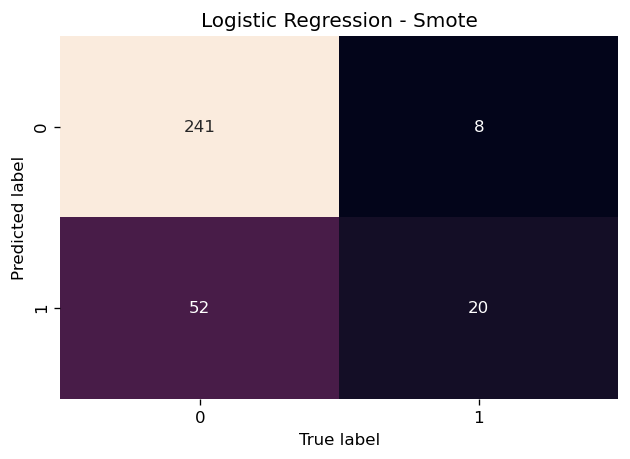

In [713]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=120)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Logistic Regression - Smote')
plt.xlabel('True label')
plt.ylabel('Predicted label')
#plt.savefig('Logistic Regression - Confusion Matrix - SMOTE')
plt.show()

In [714]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89       293
         1.0       0.28      0.71      0.40        28

    accuracy                           0.81       321
   macro avg       0.62      0.77      0.64       321
weighted avg       0.91      0.81      0.85       321



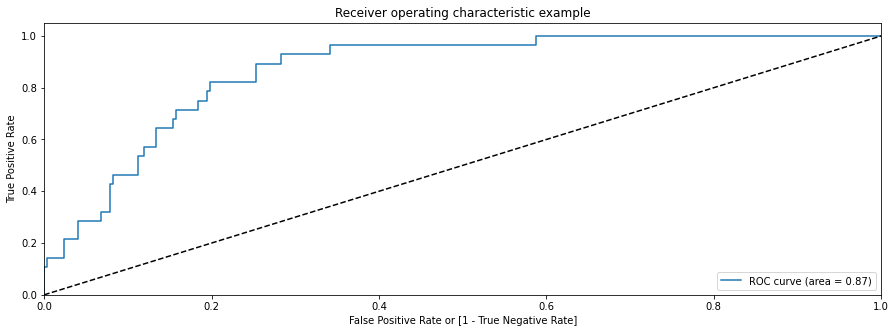

In [715]:
# Predicted probability
y_test_pred_proba = logistic_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [716]:
#Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split:
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Minimum number of samples required to split a node :
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node :
min_samples_leaf = [1, 2, 5, 10]

In [717]:
#Setting the random grid :
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [718]:
random_forests = RandomForestClassifier()

random_forests_random = RandomizedSearchCV(estimator = random_forests, param_distributions = param_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = -1)

In [719]:
random_forests_random.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [720]:
random_forests_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [721]:
random_forests = RandomForestClassifier( n_estimators = 1000,
                                         min_samples_split = 2,
                                         min_samples_leaf = 1,
                                         max_features = 'sqrt',
                                         max_depth = 25,
                                         random_state = 101)

In [722]:
random_forests = random_forests.fit(X_train_smote,y_train_smote)
predictions=random_forests.predict(X_test)

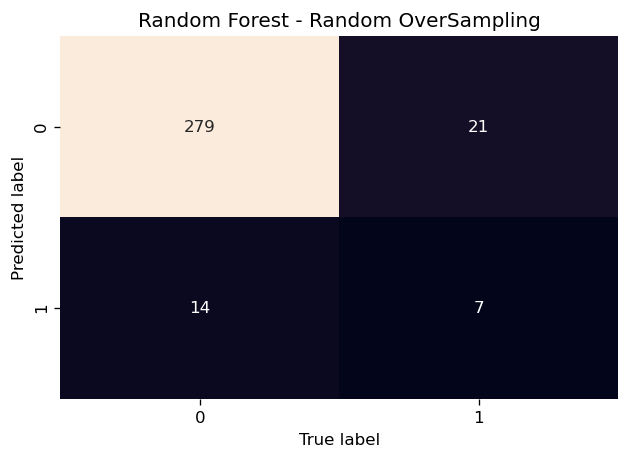

In [723]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=120)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Random Forest - Random OverSampling')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [724]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       293
         1.0       0.33      0.25      0.29        28

    accuracy                           0.89       321
   macro avg       0.63      0.60      0.61       321
weighted avg       0.88      0.89      0.88       321



In [725]:
importances = random_forests.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,1.993532e-01,town_freq_encode
1,1.169437e-01,occupation_level_scaled
2,9.784881e-02,relationship_Husband
3,8.912071e-02,education_encoded_scaled
4,5.648379e-02,salary_in_gbp_scaled
5,4.234848e-02,hours_per_week_scaled
6,3.275003e-02,relationship_Not-in-family
7,3.189853e-02,view_FB_scaled
8,2.966775e-02,job_title_encoded_scaled
9,2.751587e-02,employement_duration_years_scaled


In [726]:
import pickle
with open("random_forests_combine", "wb") as f:
    pickle.dump(random_forests, f)

#### Prediction : Target missing value imputation

In [730]:
target_df.drop(['created_account','net_profit_scaled'],axis=1,inplace=True)
target_df.head()

,interested_insurance,new_mortgage,sex,age_by_decade_20s,age_by_decade_30s,age_by_decade_40s,age_by_decade_50s,age_by_decade_60s,age_by_decade_70s,age_by_decade_80s,teens,town_freq_encode,religion_Buddhism,religion_Christianity,religion_Hinduism,religion_Islam,religion_Not-Stated,religion_Other-religions,religion_Sikhism,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,United Kingdom_native_country,Scotland_native_country,Unknown_native_country,Poland_native_country,Germany_native_country,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,workclass_Without-pay,demographic_group_1,demographic_group_2,demographic_group_3,demographic_group_4,occupation_level_scaled,familiarity_FB_scaled,view_FB_scaled,hours_per_week_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,education_encoded_scaled,job_title_encoded_scaled
7,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.162607,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.615389,-1.235990,1.897018,2.183799,1.588402,0.523472,0.514696,0.368745
14,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.721309,1.019209,-0.459743,-0.016936,-0.630107,-0.956835,-1.217335,-0.603788
15,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.721309,1.019209,-0.459743,-1.777524,-0.194268,-1.036472,-1.217335,-0.603788
75,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.057590,1.019209,-0.459743,-0.897230,-0.638620,-0.401925,1.813719,-0.639153
76,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.057590,1.019209,-0.459743,-0.721171,-0.148581,-0.846482,1.813719,-0.639153


In [731]:
predictions=pd.DataFrame(random_forests.predict(target_df))
predictions.columns = ['created_account']
predictions.head()

,created_account
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [732]:
substitute = {0:'No',1:'Yes'}
predictions['created_account'] = predictions['created_account'].map(substitute)
predictions['created_account'].value_counts()

No     14154
Yes      828
Name: created_account, dtype: int64

In [733]:
#final_preds = pd.concat([target_df_copy,predictions],axis=1)
concat_df.drop('created_account',inplace=True,axis=1)
final_preds = pd.concat([concat_df.reset_index(drop=True),predictions.reset_index(drop=True)], axis=1)
#final_preds.drop('created_account',axis=1,inplace=True)
#final_preds = final_preds.rename({0:'created_account'},axis=1)
final_preds.shape

(16586, 23)

In [734]:
yes_df = final_preds[final_preds['created_account'] == 'Yes']
yes_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,town,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,created_account
36,36,HS-grad,"Administrator, sports",4,6,9,0,Leeds,£13328 - 24157 range,6,3,40,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Private,155537,Yes
37,28,Some-college,Contractor,10,8,2,0,Edinburgh,1908801634263.09NIO,0,9,40,0,0,Yes,Female,Christianity,Not-in-family,White,United Kingdom,Private,183175,Yes
64,22,HS-grad,Human resources officer,4,8,4,1,Edinburgh,£355.75 pw,0,9,41,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,102632,Yes
75,61,HS-grad,Health physicist,9,3,9,0,Swindon,£2315.07 per month,26,9,40,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-inc,66614,Yes
81,64,11th,Database administrator,4,9,2,0,Edinburgh,£21124 yearly,19,0,40,0,2179,Yes,Male,Not Stated,Husband,White,United Kingdom,Private,181232,Yes


In [735]:
yes_df.shape

(828, 23)

In [ ]:
	0.224474	town_freq_encode
1	0.092615	education_encoded_scaled
2	0.092068	occupation_level_scaled
3	0.084728	relationship_Husband
4	0.044627	view_FB_scaled
5	0.042200	salary_in_gbp_scaled
6	0.037855	relationship_Not-in-family

In [736]:
yes_df['town'].value_counts()

Edinburgh                506
Swindon                  124
Oxford                    40
Bristol                   32
Leeds                     31
Sunderland                 9
Leicester                  5
Lincoln                    5
East Stuart                1
South Gavin                1
Harrisfurt                 1
Hartleyborough             1
Morrisport                 1
Jonathanhaven              1
Parkerburgh                1
Port Cameron               1
Adrianland                 1
Port Jake                  1
West Sallyville            1
Knighthaven                1
Gerardport                 1
South Eleanor              1
Hunterfort                 1
Lake Eleanorfort           1
East Eleanor               1
Andreaside                 1
Nicholsonton               1
Glenmouth                  1
East Mariaberg             1
Wardberg                   1
Rogersland                 1
Carolineberg               1
Ronaldfurt                 1
Lake Bethanybury           1
East Bethborou

In [737]:
yes_df['education'].value_counts()

HS-grad         254
Some-college    212
Bachelors       114
Assoc-voc        41
Masters          36
11th             31
10th             27
Assoc-acdm       25
7th-8th          17
Prof-school      16
Doctorate        15
9th              14
12th             13
5th-6th           7
1st-4th           5
Preschool         1
Name: education, dtype: int64

In [738]:
yes_df['occupation_level'].value_counts()

6     102
8     101
12     75
10     73
7      63
4      62
2      58
3      49
11     45
9      41
5      39
1      33
13     33
14     26
16      9
15      8
17      5
18      4
19      2
Name: occupation_level, dtype: int64

In [739]:
yes_df['relationship'].value_counts()

Husband           318
Not-in-family     211
Own-child         134
Unmarried          99
Wife               36
Other-relative     30
Name: relationship, dtype: int64

In [740]:
yes_df['view_FB'].value_counts()

4     114
2     104
9      94
6      91
8      88
7      87
3      86
5      83
1      67
10     14
Name: view_FB, dtype: int64

In [741]:
#'salary_band' preprocessing. Use data from currency conversion API and convert into GBP 

yes_df['salary_band_new'] = yes_df['salary_band'].astype(str).str.lower()
yes_df['salary_band_new'].replace({' yearly': '', '£':''}, regex=True, inplace=True)
yes_df['salary_band_new'].replace({' pw': ' * 52', ' per month':' * 12'}, regex=True, inplace=True)
yes_df['salary_band_new'].replace({' range': '', ' - ': ' + '}, regex=True, inplace=True)
yes_df['salary_band_new'].replace({'^[a-z]+$': 0}, regex=True, inplace=True)
yes_df.loc[yes_df.astype(str).salary_band_new.str.contains('\+'),'salary_band_new'] = '(' + yes_df['salary_band_new'].astype(str) + ') / 2'
yes_df['currency'] = yes_df['salary_band_new'].str[-3:]            
yes_df['currency'] = yes_df['currency'].fillna('gbp')
yes_df['currency'].replace({'[^a-z]+$': 'gbp'}, regex=True, inplace=True)
yes_df['salary_band_new'].replace({'[a-z]+$': ''}, regex=True, inplace=True)
yes_df['salary_band_new'] = yes_df['salary_band_new'].astype(str)
yes_df['salary_band_new'] = yes_df['salary_band_new'].apply(lambda x: eval(x) if (pd.notnull(x)) else x)

currency_conversion = pd.read_csv('currency_conversion.csv')
currency_conversion.drop('Unnamed: 0',axis = 1,inplace=True)    

yes_df = pd.merge(yes_df,currency_conversion,on='currency',how='inner')
yes_df = yes_df.assign(salary_in_gbp= lambda x:(x['salary_band_new'] / x['rate']))
yes_df.drop(['salary_band','salary_band_new','currency','rate'],axis=1,inplace=True)

upper_cap = round(yes_df['salary_in_gbp'].quantile(0.92),2)

yes_df['salary_in_gbp'] = np.where(yes_df['salary_in_gbp']>upper_cap,upper_cap,yes_df.salary_in_gbp)

In [742]:
yes_df['salary_in_gbp'].describe()

count      828.000000
mean     29191.495499
std      17639.471385
min          0.000000
25%      18576.710000
50%      23031.440000
75%      33926.750000
max      75579.080000
Name: salary_in_gbp, dtype: float64

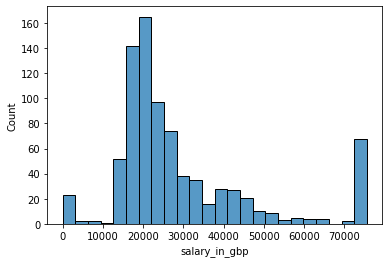

In [743]:
sns.histplot((yes_df['salary_in_gbp']))
plt.show()

In [744]:
yes_df.head()

,age,education,job_title,occupation_level,familiarity_FB,view_FB,interested_insurance,town,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,created_account,salary_in_gbp
0,36,HS-grad,"Administrator, sports",4,6,9,0,Leeds,6,3,40,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Private,155537,Yes,18742.50
1,22,HS-grad,Human resources officer,4,8,4,1,Edinburgh,0,9,41,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,102632,Yes,18499.00
2,61,HS-grad,Health physicist,9,3,9,0,Swindon,26,9,40,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-inc,66614,Yes,27780.84
3,64,11th,Database administrator,4,9,2,0,Edinburgh,19,0,40,0,2179,Yes,Male,Not Stated,Husband,White,United Kingdom,Private,181232,Yes,21124.00
4,27,HS-grad,Translator,4,7,1,0,Edinburgh,0,1,25,0,0,Yes,Female,Christianity,Unmarried,White,United Kingdom,Private,253814,Yes,14481.00


In [747]:
yes_df['town'].value_counts()

Edinburgh                506
Swindon                  124
Oxford                    40
Bristol                   32
Leeds                     31
Sunderland                 9
Leicester                  5
Lincoln                    5
Jonathanhaven              1
Lake Eleanorfort           1
South Gavin                1
Harrisfurt                 1
Hartleyborough             1
Morrisport                 1
East Stuart                1
Angelafurt                 1
Parkerburgh                1
Adrianland                 1
Port Jake                  1
West Sallyville            1
Knighthaven                1
Gerardport                 1
South Eleanor              1
Port Cameron               1
East Eleanor               1
Nicholsonton               1
North Aimee                1
Glenmouth                  1
East Mariaberg             1
Wardberg                   1
Rogersland                 1
Carolineberg               1
Andreaside                 1
Ronaldfurt                 1
Lake Bethanybu

In [749]:
yes_df['workclass'].replace({'\?': 'Unknown'}, regex=True, inplace=True)
round(yes_df['workclass'].value_counts(normalize=True)*100,2)

Private             72.22
Self-emp-not-inc     6.64
Unknown              6.04
Local-gov            4.83
Self-emp-inc         4.59
State-gov            3.62
Federal-gov          2.05
Name: workclass, dtype: float64

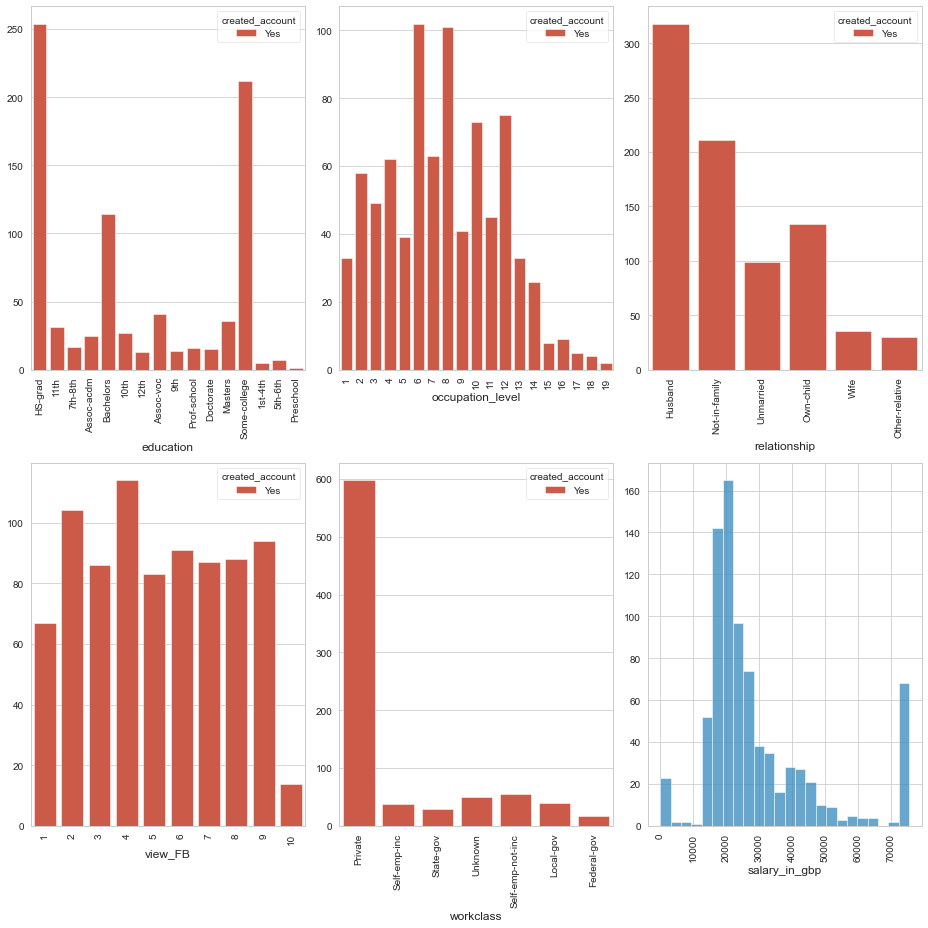

In [755]:
fig, axis = plt.subplots(2,3, figsize = (13,13))

plt.style.use('ggplot')
sns.set_style('whitegrid')

plt1 = sns.countplot(x = 'education', data = yes_df, hue = 'created_account', ax = axis[0][0])
plt1.set(xlabel = 'education', ylabel= '')

plt1 = sns.countplot(x = 'occupation_level', data = yes_df, hue = 'created_account', ax = axis[0][1])
plt1.set(xlabel = 'occupation_level', ylabel= '')

plt1 = sns.countplot(x = 'relationship', data = yes_df, hue = 'created_account', ax = axis[0][2])
plt1.set(xlabel = 'relationship', ylabel= '')

plt1 = sns.countplot(x = 'view_FB', data = yes_df, hue = 'created_account', ax = axis[1][0])
plt1.set(xlabel = 'view_FB', ylabel= '')

plt1 = sns.countplot(x = 'workclass', data = yes_df, hue = 'created_account', ax = axis[1][1])
plt1.set(xlabel = 'workclass', ylabel= '')

plt1 = sns.histplot((yes_df['salary_in_gbp']), ax = axis[1][2])
plt1.set(xlabel = 'salary_in_gbp', ylabel= '')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.savefig('Final recommendations')
plt.tight_layout()
plt.show()